*   Nama : Iqbal Aliandra Putra
*   Email : iqbalaliandra02@mail.ugm.ac.id
*   Kota : Bogor
*   Proyek Akhir : Klasifikasi Gambar


In [1]:
# Menyiapkan library yang dipakai
import tensorflow as tf  # Untuk library jaringan saraf tiruan

In [2]:
# Menyiapkan dataset yang di pakai
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-21 17:48:14--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  3.46MB/s    in 61s     

2021-07-21 17:49:16 (5.03 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# Melakukan ekstrak file ZIP
import zipfile, os

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
# Mengatur dan membuat nama direktori untuk train dan data validation
base_dir = '/tmp/rockpaperscissors'
latih_dir = os.path.join(base_dir,'latih')
validasi_dir = os.path.join(base_dir,'validasi')

if not os.path.exists(latih_dir):
  os.mkdir(latih_dir)
if not os.path.exists(validasi_dir):
  os.mkdir(validasi_dir)

In [5]:
# Menentukan path untuk paper, rock, dan scissors
paper_dir = os.path.join(base_dir,'paper')
rock_dir = os.path.join(base_dir,'rock')
scissors_dir = os.path.join(base_dir,'scissors')

In [6]:
# paper, rock, dan scissors dipisah menjadi data latih dan data validasi dengan validasi 40%
from sklearn.model_selection import train_test_split

latih_paper_dir, validasi_paper_dir = train_test_split(os.listdir(paper_dir), test_size=0.4)
latih_rock_dir, validasi_rock_dir = train_test_split(os.listdir(rock_dir), test_size=0.4)
latih_scissors_dir, validasi_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size=0.4)

In [7]:
# Menentukan path untuk paper, rock, dan scissors yang sudah dipisah serta membuat direktori baru
latih_paper = os.path.join(latih_dir, 'paper')
latih_rock = os.path.join(latih_dir, 'rock')
latih_scissors = os.path.join(latih_dir, 'scissors')
validasi_paper = os.path.join(validasi_dir, 'paper')
validasi_rock = os.path.join(validasi_dir, 'rock')
validasi_scissors = os.path.join(validasi_dir, 'scissors')

if not os.path.exists(latih_paper):
  os.mkdir(latih_paper)
if not os.path.exists(latih_rock):
  os.mkdir(latih_rock)
if not os.path.exists(latih_scissors):
  os.mkdir(latih_scissors)
if not os.path.exists(validasi_paper):
  os.mkdir(validasi_paper)
if not os.path.exists(validasi_rock):
  os.mkdir(validasi_rock)
if not os.path.exists(validasi_scissors):
  os.mkdir(validasi_scissors)

In [8]:
# Menyalin data menggunakan copy dari shutil
import shutil

for i in latih_paper_dir:
  shutil.copy(os.path.join(paper_dir, i), os.path.join(latih_paper, i))
for i in latih_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(latih_rock, i))
for i in latih_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, i), os.path.join(latih_scissors, i))
for i in validasi_paper_dir:
  shutil.copy(os.path.join(paper_dir, i), os.path.join(validasi_paper, i))
for i in validasi_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(validasi_rock, i))
for i in validasi_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, i), os.path.join(validasi_scissors, i))

In [9]:
# Melihat struktur data train/latih yang telah dibuat
os.listdir('/tmp/rockpaperscissors/latih')

['scissors', 'paper', 'rock']

In [10]:
# Melihat struktur data validation/validasi yang telah dibuat
os.listdir('/tmp/rockpaperscissors/validasi')

['scissors', 'paper', 'rock']

In [11]:
# Menghitung jumlah data training dan validasi
train_p = len(os.listdir('/tmp/rockpaperscissors/latih/paper'))
train_r = len(os.listdir('/tmp/rockpaperscissors/latih/rock'))
train_s = len(os.listdir('/tmp/rockpaperscissors/latih/scissors'))
val_p = len(os.listdir('/tmp/rockpaperscissors/validasi/paper'))
val_r = len(os.listdir('/tmp/rockpaperscissors/validasi/rock'))
val_s = len(os.listdir('/tmp/rockpaperscissors/validasi/scissors'))
print('Data training : {} sampel'.format(train_p + train_r + train_s))
print('Data validasi : {} sampel'.format(val_p + val_r + val_s))

Data training : 1312 sampel
Data validasi : 876 sampel


In [12]:
# Proses augmentasi gambar dengan image data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [13]:
# Menyiapkan data latih yang dipelajari model, class_mode memakai categorical karena kelas lebih dari 2
train_generator = train_datagen.flow_from_directory(
        latih_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        validasi_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [14]:
# Membangun arsitektur sebuah CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [15]:
class Callback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > 0.96 and logs.get('val_accuracy') > 0.96):
            print("\nReached 96% accuracy") 
            self.model.stop_training = True 
 
callbacks = Callback()

In [16]:
# Compile model dengan loss function 'categorical_crossentropy' dan optimizer 'adam'
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [17]:
# Melatih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2,
      callbacks=[callbacks])

Epoch 1/20
25/25 - 38s - loss: 1.0691 - accuracy: 0.4225 - val_loss: 1.0194 - val_accuracy: 0.5750
Epoch 2/20
25/25 - 7s - loss: 0.8788 - accuracy: 0.6862 - val_loss: 0.7116 - val_accuracy: 0.7375
Epoch 3/20
25/25 - 7s - loss: 0.6299 - accuracy: 0.7725 - val_loss: 0.5722 - val_accuracy: 0.8000
Epoch 4/20
25/25 - 7s - loss: 0.5656 - accuracy: 0.7800 - val_loss: 0.4608 - val_accuracy: 0.8500
Epoch 5/20
25/25 - 6s - loss: 0.4103 - accuracy: 0.8525 - val_loss: 0.3337 - val_accuracy: 0.8938
Epoch 6/20
25/25 - 6s - loss: 0.3194 - accuracy: 0.8950 - val_loss: 0.4333 - val_accuracy: 0.8375
Epoch 7/20
25/25 - 6s - loss: 0.2778 - accuracy: 0.9150 - val_loss: 0.2355 - val_accuracy: 0.9250
Epoch 8/20
25/25 - 6s - loss: 0.2602 - accuracy: 0.9175 - val_loss: 0.2439 - val_accuracy: 0.9312
Epoch 9/20
25/25 - 7s - loss: 0.2363 - accuracy: 0.9275 - val_loss: 0.1736 - val_accuracy: 0.9563
Epoch 10/20
25/25 - 7s - loss: 0.1837 - accuracy: 0.9550 - val_loss: 0.1926 - val_accuracy: 0.9438
Epoch 11/20
25/25 

Saving 170275.jpg to 170275.jpg
170275.jpg
Batu


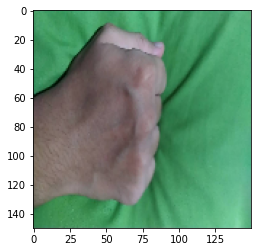

In [18]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # Prediksi image
  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0]==1:
    print('Kertas')
  elif classes[0][1]==1:
    print('Batu')
  elif classes[0][2]==1:
    print('Gunting')
  else:
    print('Tidak Pasti')